In [2]:
import numpy as np
import pandas as pd

import cv2
import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Loading the model
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",
                   input_shape=IMAGE_SHAPE+(3,))
])

In [5]:
# Getting the label of all the item of the trained model
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

## Data COllection

In [6]:
# Laoding the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 14s 0us/step


In [7]:
data_dir

'./datasets/flower_photos'

In [8]:
import pathlib

data_path = pathlib.Path(data_dir)
data_path

PosixPath('datasets/flower_photos')

In [9]:
# get all the files with jpg extension i.e get all the images
image_count = len(list(data_path.glob('*/*.jpg')))
# glob: a function that's used to search for files that match a specific file pattern or name
image_count

3670

In [10]:
roses = list(data_path.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

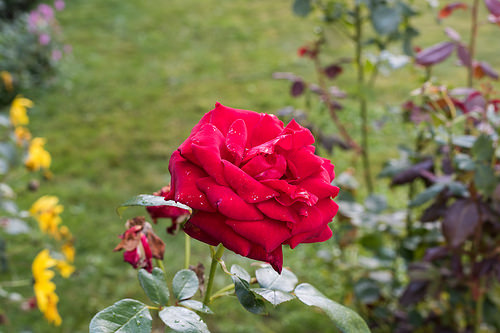

In [11]:
# Open the image using Pillow Library
Image.open(str(roses[3]))

In [12]:
# Create a dictonary for all the type of flower's path

flower_dict = {
    'roses': list(data_path.glob('roses/*')),
    'daisy': list(data_path.glob('daisy/*')),
    'dandelion': list(data_path.glob('dandelion/*')),
    'sunflowers': list(data_path.glob('sunflowers/*')),
    'tulips': list(data_path.glob('tulips/*')),
}

In [13]:
# set the index value for each class
flower_dict_labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
# Using cv2 to read the image file
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(243, 500, 3)

In [15]:
# Build the X and Y
X, Y = [], []

for flower_name, images in flower_dict.items():
  print(flower_name)
  print(len(images))
  # resize all the image to same dimenions
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (224, 224))
    X.append(resized_img)
    Y.append(flower_dict_labels[flower_name])


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [16]:
# COnvert X and Y to numpy array

X = np.array(X)
Y = np.array(Y)

## Model Building with classification

Considering the whole model

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
# Scale the values of X_train and X_test

X_train_scaled = X_train /255
X_test_scaled = X_test / 255

In [20]:
X_train_scaled[0]

array([[[0.67843137, 0.71764706, 0.75686275],
        [0.67843137, 0.71764706, 0.75686275],
        [0.67843137, 0.71764706, 0.75686275],
        ...,
        [0.22745098, 0.32941176, 0.42352941],
        [0.22352941, 0.32941176, 0.42352941],
        [0.21960784, 0.32156863, 0.41568627]],

       [[0.66666667, 0.70588235, 0.74509804],
        [0.66666667, 0.70588235, 0.74509804],
        [0.66666667, 0.70588235, 0.74509804],
        ...,
        [0.22745098, 0.32941176, 0.42352941],
        [0.22352941, 0.3254902 , 0.41960784],
        [0.21960784, 0.32156863, 0.41568627]],

       [[0.65490196, 0.69411765, 0.73333333],
        [0.65490196, 0.69411765, 0.73333333],
        [0.65098039, 0.69019608, 0.72941176],
        ...,
        [0.22745098, 0.32941176, 0.42352941],
        [0.22745098, 0.32941176, 0.41960784],
        [0.21960784, 0.32156863, 0.41568627]],

       ...,

       [[0.23137255, 0.35294118, 0.35686275],
        [0.22745098, 0.34509804, 0.34901961],
        [0.22352941, 0

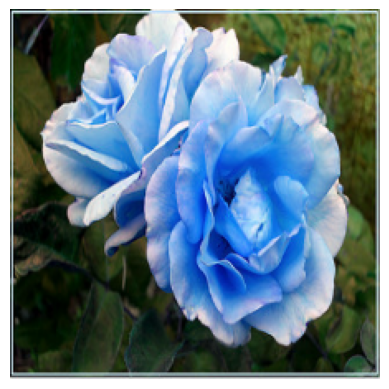

In [21]:
plt.axis('off')
plt.imshow(X[2])

In [22]:
class_predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
print(class_predicted)
predicted = np.argmax(class_predicted, axis =1)
predicted


1/1 [==============================] - 0s 457ms/step
[[ 0.5014454  -2.4587631   1.9480258  ... -1.82653    -1.1995213
   3.31192   ]
 [ 0.24143144 -1.2708052   1.8124489  ... -1.3554509  -0.97454584
   4.2789288 ]
 [ 0.31761733 -0.49655282  1.5056534  ... -1.7222222  -1.8558595
   4.457672  ]]


array([795, 795, 722])

In [23]:
image_labels[795]

'shower curtain'

In [24]:
image_labels[550]

'envelope'

In [25]:
image_labels[722]

'pillow'

## Model building with feature Vector

Excluding the last layer

In [26]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [27]:
# layer from pretrained model but training it
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [28]:
num_of_flowers = 5

# Building the model with pretrained layer and last output layer
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [30]:
# COmpiling the model
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

# training the model
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 31s 317ms/step - loss: 0.8127 - acc: 0.6911
Epoch 2/5
92/92 [==============================] - 29s 320ms/step - loss: 0.4083 - acc: 0.8569
Epoch 3/5
92/92 [==============================] - 30s 326ms/step - loss: 0.3203 - acc: 0.8927
Epoch 4/5
92/92 [==============================] - 30s 327ms/step - loss: 0.2684 - acc: 0.9166
Epoch 5/5
92/92 [==============================] - 30s 326ms/step - loss: 0.2303 - acc: 0.9309


In [31]:
# Evaluate model for test data
model.evaluate(X_test_scaled, Y_test)

23/23 [==============================] - 8s 323ms/step - loss: 0.3702 - acc: 0.8760


[0.37020736932754517, 0.8760218024253845]

In [32]:
# performing the prediction
Y_pred = model.predict(X_test_scaled)

23/23 [==============================] - 8s 319ms/step


In [33]:
Y_pred

array([[-5.3408504 ,  2.9202764 ,  0.42565292, -2.0121737 , -4.612049  ],
       [ 0.6365989 , -4.526623  , -4.2791743 , -3.3151767 , -1.0813756 ],
       [-3.451981  , -2.6076787 ,  3.0966785 , -0.5175195 , -3.6475961 ],
       ...,
       [-3.8050237 ,  2.416398  , -1.5029352 , -0.2898513 , -1.8279597 ],
       [-7.4925623 , -0.76105744,  5.916602  , -0.5526023 , -5.737706  ],
       [-4.7483315 , -5.3726745 , -0.05624903, -2.6386335 , -1.7391598 ]],
      dtype=float32)

In [35]:
# getting the class with highest probability based on the predicted probabilities of each class
Y_pred_classes = np.argmax(Y_pred, axis =1)
Y_pred_classes

array([1, 0, 2, 4, 4, 3, 0, 4, 4, 0, 1, 3, 2, 3, 4, 2, 1, 1, 4, 2, 2, 2,
       4, 2, 3, 0, 2, 4, 4, 0, 4, 2, 2, 3, 1, 1, 2, 2, 4, 1, 4, 4, 4, 4,
       2, 3, 3, 3, 2, 1, 0, 0, 2, 3, 1, 2, 0, 3, 4, 4, 0, 2, 1, 4, 2, 3,
       2, 0, 4, 4, 2, 2, 2, 0, 1, 0, 4, 1, 2, 0, 4, 2, 3, 1, 1, 4, 2, 3,
       4, 2, 0, 2, 2, 4, 3, 3, 1, 0, 3, 3, 2, 4, 4, 0, 0, 1, 0, 1, 0, 2,
       1, 0, 3, 3, 4, 3, 0, 0, 0, 0, 4, 3, 0, 4, 1, 2, 2, 0, 4, 2, 2, 0,
       4, 1, 0, 1, 3, 4, 3, 3, 3, 2, 3, 4, 2, 3, 0, 3, 2, 3, 4, 2, 0, 2,
       4, 1, 4, 2, 2, 4, 3, 0, 1, 4, 0, 1, 0, 1, 4, 0, 4, 4, 0, 0, 0, 4,
       3, 1, 3, 3, 2, 2, 4, 1, 0, 4, 2, 2, 2, 2, 4, 3, 2, 1, 4, 4, 2, 2,
       3, 2, 0, 2, 2, 4, 0, 0, 3, 2, 4, 3, 3, 3, 2, 3, 0, 1, 0, 0, 0, 4,
       0, 2, 2, 4, 1, 2, 1, 2, 3, 3, 0, 1, 0, 3, 2, 2, 1, 3, 3, 4, 4, 2,
       2, 3, 2, 0, 0, 0, 4, 3, 4, 0, 0, 2, 0, 3, 0, 1, 0, 2, 2, 1, 3, 4,
       1, 0, 2, 1, 3, 0, 0, 2, 4, 1, 4, 0, 0, 1, 2, 4, 0, 3, 3, 4, 1, 4,
       4, 2, 2, 1, 2, 1, 2, 0, 2, 1, 4, 4, 0, 1, 4,

In [36]:
Y_pred_classes[:5]

array([1, 0, 2, 4, 4])

In [38]:
Y_test[:5]

array([1, 0, 2, 4, 2])